# Project: No-show Appointment Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction

The dataset collects information from 100k medical appointments in Brazil. A number of characteristics about the patient are included.
>
<li>'PatientID' identifies a specific patient.
<li>'AppointmentID' identifies a specific appointment.
<li>'Gender' indicates the gender of the patient.
<li>‘ScheduledDay’ tells us the date the patient set up their appointment.
<li>'AppointmentDay' tells us the date of the appointment.
<li>'Age' indicates the age of the patient.
<li>‘Neighborhood’ indicates the location of the hospital.
<li>‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
<li>'Hipertension' indicates whether or not the patient is suffering from hipertension.
<li>'Diabetes' indicates whether or not the patient is suffering from diabetes.
<li>'Alcoholism' indicates whether or not the patient is suffering from alcoholism.
<li>'Handcap' indicates whether or not the patient has a disability.
<li>'SMS_received' tells us if the patient received an SMS upfront about the upcoming appointment.
<li>'No-show' indicates whether or not the patient showed up for their appointment.

This analysis focuses on data of patients that showed up or didn't show up for their medical appointments.
The intention is to find differences between the two groups.

### Questions

>
<li>Do no-shows for appointments differ depending on the age of the patient? Hypothesis: Older patients are more responsible and have a lower no-show rate.
<li>Do no-shows for appointments differ if patients received an SMS? Hypothesis: Patients that received an SMS are reminded of their appointment and have a lower no-show rate.
<li>Do no-shows for appointments differ if patients have a scholarship? Hypothesis: Patients with a scholarship have an insurance and therefore, don't need to worry about the expenses of an appointment and have a lower no-show rate.
<li>Do no-shows for appointments differ if the appointment is scheduled way in advance? Hypothesis: Patients that schedule their appointments way in advance, forget about them and have a higher no-show rate.

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [89]:
# import of packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [90]:
# load data 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [91]:
# get first impression of data
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [92]:
df.tail(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [93]:
# display information about variables, e.g. name, null values and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [94]:
# display unique values for each variable
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

The variables that will be used for the analysis are 'ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship', 'SMS_received', 'No-show'.
>
<li>'ScheduledDay' includes the date as well as the time of day. The variable is formatted as a string. The format will be changed to date only and the time will be dropped because the difference between 'ScheduledDay' and 'AppointmentDay' will be calculated.
<li>'AppointmentDay' includes the date as well as the time of day. The variable is formatted as a string. The format will be changed to date only and the time will be dropped because the difference between 'ScheduledDay' and 'AppointmentDay' will be calculated.
<li>'SMS_received is encoded as 0 meaning no SMS was received and 1 meaning an SMS was received.
<li>'No-show' is encoded in a way that 'no' means patients showed up for their appointments and 'yes' means patients didn't show up for their appointment.

In [95]:
# calculate main descriptive information
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The patients are relatively young with a mean of 37 years.
The data for age shows some unexpected values. The minimum value is -1 and the maximum value is 115. Both values don't seem plausible. The data will be cleaned in the next section.

Around 90% of the patients are not enrolled in the Brasilian welfare program Bolsa Família.

Around 32% of patients received an SMS. 

In [96]:
# display null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [97]:
# display duplicate values
df.duplicated().sum()

0

There are no null values or duplicated values. Therefore, the dataset doesn't need to be cleaned in that regard. 

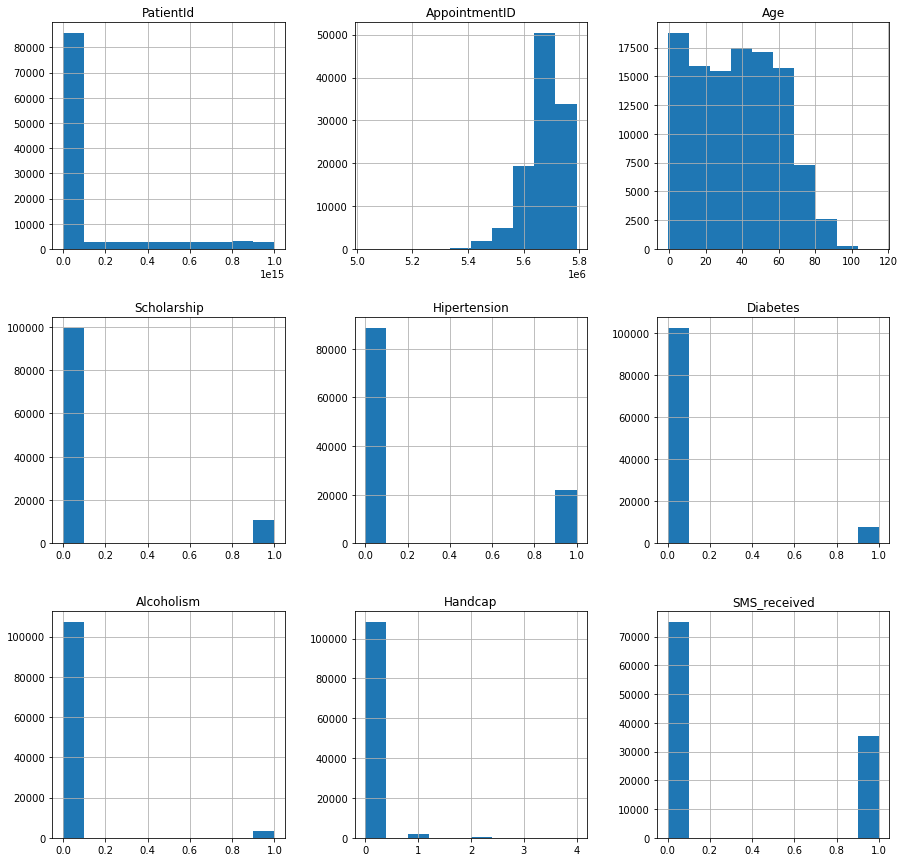

In [98]:
# create histogram of variables
df.hist(figsize=(15,15));

The histogram confirms all the observations so far.

In [99]:
# display overview of no-show data
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

Most of the people showed up for their appointment.

In [100]:
# display overview of gender data
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

There are more female patients than male patients.

In [101]:
# display overview of age data
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [102]:
# find implausible values, e.g. age below 0
sum(df['Age']<0)

1

Ages below 0 don't seem plausible and therefore, will be dropped. There is one data point that needs to be deleted.

In [103]:
# find implausible values, e.g. age above 100
sum(df['Age']>100)

7

Ages over 100 don't seem plausible and therefore, will be dropped. There are 7 data points that need to be deleted.

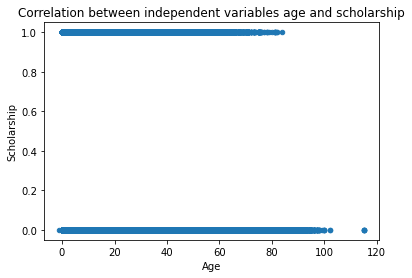

In [104]:
# check correlation between analyzed variables - age and scholarship
df.plot(x='Age', y='Scholarship', title = 'Correlation between independent variables age and scholarship', kind='scatter');

There is a visible difference visible the age group over 90. Basically nobody over 90 years old is enrolled in the program.

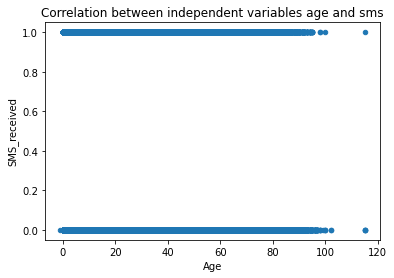

In [105]:
# check correlation between analyzed variables - age and sms
df.plot(x='Age', y='SMS_received', title='Correlation between independent variables age and sms' , kind='scatter');

There is almost no visible difference. There is only one exception for the age group slightly below 100 where slightly  more patients received an SMS than didn't receive an SMS.

### Data Cleaning 

In [106]:
# drop unnecessary colums 
df.drop(['PatientId', 'AppointmentID', 'Gender', 'Neighbourhood', 'Hipertension', 'Diabetes', 'Alcoholism', 
         'Handcap'], axis=1, inplace=True)
df.head()

,ScheduledDay,AppointmentDay,Age,Scholarship,SMS_received,No-show
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,0,No
1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,No
2,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,No
3,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,No
4,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,0,No


The columns are dropped because they are not relevant for the analysis. 

In [107]:
# clean column names
new_labels = ['scheduled_day', 'appointment_day', 'age', 'scholarship', 'sms', 'no_show']
df.columns = new_labels

In [108]:
# change format of dates to include only days not the time because the difference in days is needed for analysis
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

df['scheduled_day'] = df['scheduled_day'].dt.date
df['appointment_day'] = df['appointment_day'].dt.date

In [109]:
# find and delete implausible data where the scheduled day is later than the appointment day
df = df[df['scheduled_day'] < df['appointment_day']]

In [110]:
# find and delete implausible data for days (ages below 0 and above 100 seem implausible)
df = df[df['age'] < 100]
df = df[df['age'] > 0]

In [111]:
# calculate the difference in days between appointment day and scheduled day
df['day_difference'] = df['appointment_day']-df['scheduled_day']

In [112]:
# convert format of difference in days to integer
df['day_difference'] = df.day_difference.dt.days

<a id='eda'></a>
## Exploratory Data Analysis

### Do no-shows for appointments differ depending on the age of the patient?

In [113]:
# display details for variable age
df.age.describe()

count    69819.000000
mean        39.668915
std         22.236608
min          1.000000
25%         21.000000
50%         40.000000
75%         57.000000
max         98.000000
Name: age, dtype: float64

In [114]:
# create masks for 'show' and 'no show'
df_show = df[df['no_show'] == 'No']
df_no_show = df[df['no_show'] == 'Yes']
df_show.head()

,scheduled_day,appointment_day,age,scholarship,sms,no_show,day_difference
5,2016-04-27,2016-04-29,76,0,0,No,2
9,2016-04-27,2016-04-29,19,0,0,No,2
10,2016-04-27,2016-04-29,30,0,0,No,2
12,2016-04-28,2016-04-29,22,1,0,No,1
13,2016-04-28,2016-04-29,28,0,0,No,1


In [115]:
# calculate mean of age for all patients that showed up 
x0 = df_show['age'].mean()
x0

41.19425513149455

In [116]:
# calculate mean of age for all patients that didn't showed up
y0 = df_no_show['age'].mean()
y0

35.850935728262506

In [117]:
# calculate median of age for all patients that showed up
df_show['age'].median()

43.0

In [118]:
# calculate median of age for all patients that didn't showed up
df_no_show['age'].median()

34.0

Patients that don't show up for their appointments are on average younger than those who show up. This can be concluded looking at the mean and the median. The finding supports the initial hypothesis.

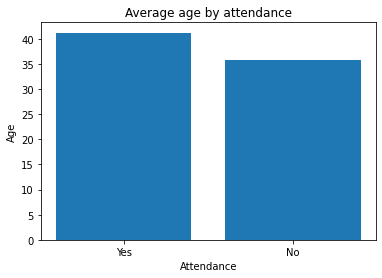

In [119]:
# plot findings
locations = [1, 2]
heights = [x0, y0]
labels = ['Yes', 'No']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average age by attendance')
plt.xlabel('Attendance')
plt.ylabel('Age');

### Do no-shows for appointments differ if patient received an sms?

In [120]:
# display details for sms 
df.sms.describe()

count    69819.000000
mean         0.495324
std          0.499982
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: sms, dtype: float64

In [121]:
# calculate proportion of patients that received an email and showed up
x1 = df_show['sms'].mean()
x1

0.5014231879409878

In [122]:
# calculate proportion of patients that received an email and didn't showed up
y1 = df_no_show['sms'].mean()
y1

0.4800561938688475

Patients that don't show up received an SMS 48,0% and patients that did show up received an SMS 50,1%. There is a small difference which supports the initial hypothesis.

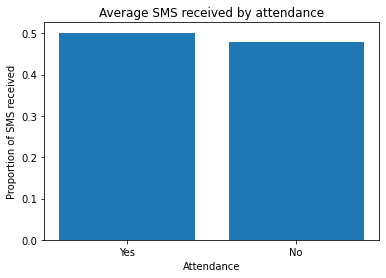

In [123]:
# plot findings
locations = [1, 2]
heights = [x1, y1]
labels = ['Yes', 'No']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average SMS received by attendance')
plt.xlabel('Attendance')
plt.ylabel('Proportion of SMS received');

### Do no-shows for appointments differ if patient have a scholarship?

In [124]:
# display details for scholarship 
df.scholarship.describe()

count    69819.000000
mean         0.095160
std          0.293438
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: scholarship, dtype: float64

In [125]:
# calculate proportion of patients that are enrolled in the program and showed up
x2 = df_show['scholarship'].mean()
x2

0.08655388069275176

In [126]:
# calculate proportion of patients that are enrolled in the program and didn't showed up
y2 = df_no_show['scholarship'].mean()
y2

0.11670262405298279

Patients that don't show up are enrolled in the program 11,7% and patients that did show up are enrolled in the program 8,7%. The finding contradicts the initial hypothesis.

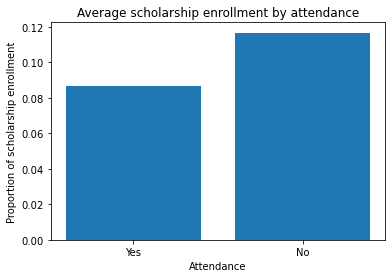

In [128]:
# plot findings
locations = [1, 2]
heights = [x2, y2]
labels = ['Yes', 'No']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average scholarship enrollment by attendance')
plt.xlabel('Attendance')
plt.ylabel('Proportion of scholarship enrollment');

### Do no-shows for appointments differ if the appointment is scheduled way in advance?

In [129]:
# display details for difference in days 
df.day_difference.describe()

count    69819.000000
mean        15.577608
std         16.513187
min          1.000000
25%          4.000000
50%          9.000000
75%         22.000000
max        179.000000
Name: day_difference, dtype: float64

On average the appointsments get scheduled 15 to 16 days in advance. However, some appointsments are scheduled one day in advance (minimum). Other appointments are scheduled 179 days in advance (maximum). 

In [136]:
# calculate average days between the time the appointment was scheduled and the actual appointment for patients
# that showed up 
x3 = df_show['day_difference'].mean()

In [137]:
# calculate average days between the time the appointment was scheduled and the actual appointment for patients
# that didn't show up 
y3 = df_no_show['day_difference'].mean()

Patients that don't show up schedule their appointments around 17 days in advance, 
whereas patients that show up schedule their appointments around 15 days in advance.
The difference is expected as the hypothesis is that patients forget about their appointments if they are scheduled
way in advance.

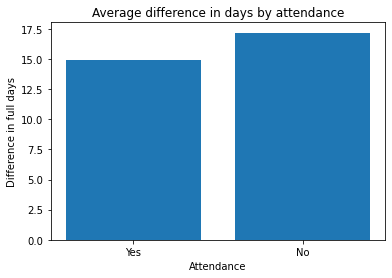

In [139]:
# plot findings
locations = [1, 2]
heights = [x3, y3]
labels = ['Yes', 'No']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average difference in days by attendance')
plt.xlabel('Attendance')
plt.ylabel('Difference in full days');

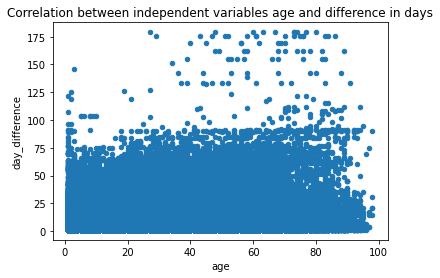

In [140]:
# check correlation between analyzed variables age and difference in days
df.plot(x='age', y='day_difference', title = 'Correlation between independent variables age and difference in days', kind='scatter');

In [141]:
df.corr(method ='pearson') 

,age,scholarship,sms,day_difference
age,1.000000,-0.122940,-0.052845,-0.002031
scholarship,-0.122940,1.000000,0.019825,-0.025378
sms,-0.052845,0.019825,1.000000,0.200680
day_difference,-0.002031,-0.025378,0.200680,1.000000


There seems to be almost no correlation between the variables age and difference in days.

<a id='conclusions'></a>
## Conclusions

### Limitations

The analysis is descriptive. Therefore, it can only show differences between groups but don't predict any future outcomes or make any statements about cause and effect.

The sample size of the data set with around 110k observations is limited because it is not clear if this sample for which population this sample might be representative and therefore, it is not clear if any generalizations can be made.

The data set has a limited number of variables that were observed and the difference between the groups was not large for the analyzed variables. It is possible that other variables show more distinct difference between the groups.

There were some implausible data which was excluded from the analysis. However, there were very few excluded data points. Therefore, the results of the analysis would are only very slightly affected.


### Do no-shows for appointments differ depending on the age of the patient? 
Hypothesis: Older patients are more responsible and have a lower no-show rate for appointments.

The findings in this descriptive analysis support the hypothesis. 
The average age for patients that showed up is around 41 and the average age for patients that didn't show up is around 36.

### Do no-shows for appointments differ if patient received an SMS? 
Hypothesis: Patients that received an SMS are reminded of their appointment and have a lower no-show rate for appointments.

The findings in this descriptive analysis support the hypothesis. However, the difference is small. 
On average patients that showed up received an SMS 50,1% and patients that didn't show up received an SMS 48,0%.


### Do no-shows for appointments differ if patient have a scholarship? 
Hypothesis: Patients with a scholarship have an insurance and therefore, don't need to worry about the expenses of an appointment and have a lower no-show rate for appointments.

The findings in this descriptive analysis contradict the hypothesis. On average patients that showed up were enrolled in the program 8,7% and patients that didn't show up were enrolled in the program 11,7%.

### Do no-shows for appointments differ if the appointment is scheduled way in advance? 
Hypothesis: Patients that schedule their appointments way in advance, forget about them and have a higher no-show rate for appointments.

The findings in this descriptive analysis support the hypothesis. However, the difference is small. On average patients that showed up scheduled their appointment around 15 days in advance and patients that didn't show up scheduled their appointment 17 days in advance.